<a href="https://colab.research.google.com/github/nazanaza2970/BENTO-PACKAGING-ACTIVITY-RECOGNITION-CHALLENGE/blob/naza/Bento_tutorial_code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [43]:
import numpy as np
import pandas as pd
import glob
from tqdm import tqdm
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from scipy import stats
import keras
import pickle

In [2]:
data = pd.DataFrame(columns = ['X1', 'Y1', 'Z1', 'X2', 'Y2', 'Z2', 'X3', 'Y3', 'Z3', 'X4', 'Y4', 'Z4',
       'X5', 'Y5', 'Z5', 'X6', 'Y6', 'Z6', 'X7', 'Y7', 'Z7', 'X8', 'Y8', 'Z8',
       'X9', 'Y9', 'Z9', 'X10', 'Y10', 'Z10', 'X11', 'Y11', 'Z11', 'X12',
       'Y12', 'Z12', 'X13', 'Y13', 'Z13', 'X14', 'Y14', 'Z14', 'X15', 'Y15',
       'Z15', 'X16', 'Y16', 'Z16', 'X17', 'Y17', 'Z17', 'X18', 'Y18', 'Z18',
       'X19', 'Y19', 'Z19', 'X20', 'Y20', 'Z20', 'X21', 'Y21', 'Z21', 'X22',
       'Y22', 'Z22', 'X23', 'Y23', 'Z23', 'X24', 'Y24', 'Z24', 'X25', 'Y25',
       'Z25', 'X26', 'Y26', 'Z26', 'X27', 'Y27', 'Z27', 'X28', 'Y28', 'Z28',
       'X29', 'Y29', 'Z29', 'subject_id', 'activity'])

In [3]:
# w_size = 10
for file in tqdm(glob.glob("/content/drive/MyDrive/Competitions/2021/Bento 2021/Data/Train_data/*")):
    temp = pd.read_csv(file)
    # trim = np.shape(temp)[0]
    # temp = temp[:-(trim%(w_size))]

    # fs = 20
    # fc = 0.1
    # b, a = signal.butter(3, fc/(fs/2))
    # for i in range(29):
    #     temp["X"+str(i+1)+"-tgravity"] = (signal.filtfilt(b,a,data["X"+str(i+1)],padlen = 9))
    #     temp["Y"+str(i+1)+"-tgravity"] = (signal.filtfilt(b,a,data["Y"+str(i+1)],padlen = 9))
    #     temp["Z"+str(i+1)+"-tgravity"] = (signal.filtfilt(b,a,data["Z"+str(i+1)],padlen = 9))
    data = data.append(temp)

100%|██████████| 151/151 [03:02<00:00,  1.21s/it]


In [4]:
data.to_pickle("/content/drive/MyDrive/Competitions/2021/Bento 2021/Data/cobined_data.pkl", compression = "xz")
data

,X1,Y1,Z1,X2,Y2,Z2,X3,Y3,Z3,X4,Y4,Z4,X5,Y5,Z5,X6,Y6,Z6,X7,Y7,Z7,X8,Y8,Z8,X9,Y9,Z9,X10,Y10,Z10,X11,Y11,Z11,X12,Y12,Z12,X13,Y13,Z13,X14,...,Y17,Z17,X18,Y18,Z18,X19,Y19,Z19,X20,Y20,Z20,X21,Y21,Z21,X22,Y22,Z22,X23,Y23,Z23,X24,Y24,Z24,X25,Y25,Z25,X26,Y26,Z26,X27,Y27,Z27,X28,Y28,Z28,X29,Y29,Z29,subject_id,activity
0,10.52415,-60.53355,1769.46826,19.62031,77.10837,1758.75049,17.93358,-87.59496,1624.30396,184.28226,2.00740,1514.37646,108.94257,-125.11385,1372.36633,468.20486,-13.62203,1418.68018,693.99133,30.89006,1371.14539,-158.49037,3.02775,1517.84497,-437.06268,-2.92413,1441.82703,-657.56964,51.03629,1436.84912,164.42105,69.51060,1045.63379,-124.72742,72.97909,1042.99365,17.38069,-105.53899,1088.44727,156.05070,...,-54.70848,93.43977,125.24022,-118.15757,45.80721,200.56557,81.19333,56.62477,-99.32026,74.15453,696.58478,-156.20908,-48.11427,503.21613,-130.22124,-22.59313,330.71866,-132.04518,-95.96079,94.25334,-79.57686,-134.15276,43.84656,-123.05315,73.55335,57.87146,70.58846,-29.00113,491.44162,189.29759,-78.74976,86.84804,-33.17119,-14.13765,499.63776,-53.01238,-71.81490,101.96735,1,1
1,10.52817,-60.58795,1769.46436,19.64179,77.08314,1758.76050,17.94336,-87.57676,1624.26697,184.29964,2.03215,1514.35510,108.94260,-125.08611,1372.34680,468.19119,-13.59372,1418.64514,693.97174,30.87851,1371.10376,-158.48219,3.05077,1517.84814,-437.06815,-2.92712,1441.85913,-657.56775,50.98067,1436.88525,164.39680,69.52014,1045.63904,-124.75513,72.99181,1043.00525,17.35496,-105.50974,1088.45435,156.27257,...,-54.72966,93.41976,125.20711,-118.12933,45.77180,200.56544,81.20042,56.62438,-99.32010,74.16196,696.57855,-156.19246,-48.11326,503.19815,-130.21829,-22.60019,330.71002,-132.03705,-95.92809,94.23438,-79.58501,-134.16400,43.87194,-123.05445,73.55637,57.87050,70.53172,-28.96927,491.45914,189.29691,-78.73817,86.83749,-33.17484,-14.14392,499.61856,-53.00563,-71.78873,101.99328,1,1
2,10.55055,-60.60601,1769.45215,19.68062,77.05927,1758.78650,17.97573,-87.60818,1624.27295,184.31618,2.00124,1514.34790,108.97218,-124.96018,1372.35876,468.20367,-13.61317,1418.58606,693.98828,30.90885,1371.04834,-158.48355,3.07477,1517.88306,-437.04840,-2.96196,1441.89343,-657.58331,50.91119,1436.93042,164.39635,69.55540,1045.63342,-124.76273,72.99422,1042.98877,17.35633,-105.49574,1088.45935,156.04936,...,-54.72046,93.43549,125.23274,-118.12671,45.79225,200.54141,81.22760,56.61964,-99.30778,74.16451,696.57501,-156.19859,-48.10444,503.19507,-130.18420,-22.61411,330.70901,-132.02545,-95.93971,94.25462,-79.58360,-134.14529,43.83124,-123.04604,73.57077,57.86041,70.97270,-28.00533,490.88690,189.32556,-78.71223,86.82835,-33.17981,-14.12837,499.65042,-53.03035,-71.84926,102.00875,1,1
3,10.58397,-60.63342,1769.43359,19.73876,77.03648,1758.80090,17.96067,-87.61305,1624.24939,184.31268,2.01727,1514.31299,108.94765,-125.08070,1372.30969,468.18979,-13.60309,1418.54285,693.98999,30.93013,1370.99524,-158.47496,3.10135,1517.88721,-437.06320,-2.97016,1441.92285,-657.58490,50.87467,1436.97803,164.37418,69.62433,1045.56030,-124.77569,73.00953,1042.99329,17.37339,-105.46514,1088.44690,156.02167,...,-54.71827,93.43443,125.22980,-118.11002,45.79120,200.55989,81.21181,56.61714,-99.32371,74.18243,696.57813,-156.21426,-48.11811,503.23373,-130.22763,-22.61368,330.69629,-132.02319,-95.95382,94.25215,-79.56788,-134.15936,43.86422,-123.04937,73.55516,57.84525,71.01060,-27.95663,490.86676,189.32050,-78.71627,86.82961,-33.17697,-14.13346,499.66898,-53.00424,-71.81989,101.98156,1,1
4,10.62354,-60.64594,1769.44263,19.77150,77.02554,1758.79492,17.96353,-87.60196,1624.25183,184.31970,1.98700,1514.29834,108.91505,-124.94808,1372.34253,468.20700,-13.60590,1418.48938,693.98187,30.96738,1370.91882,-158.47981,3.10716,1517.90430,-437.05798,-2.99169,1441.97229,-657.61096,50.83888,1437.04272,164.39314,69.65010,1045.55127,-124.80047,73.02083,1042.99146,17.36336,-105.45570,1088.45630,156.62627,...,-54.72118,93.45754,125.24659,-118.10764,45.78962,200.55869,81.20209,56.61809,-99.30765,74.17955,696.58026,-156.22467,-4

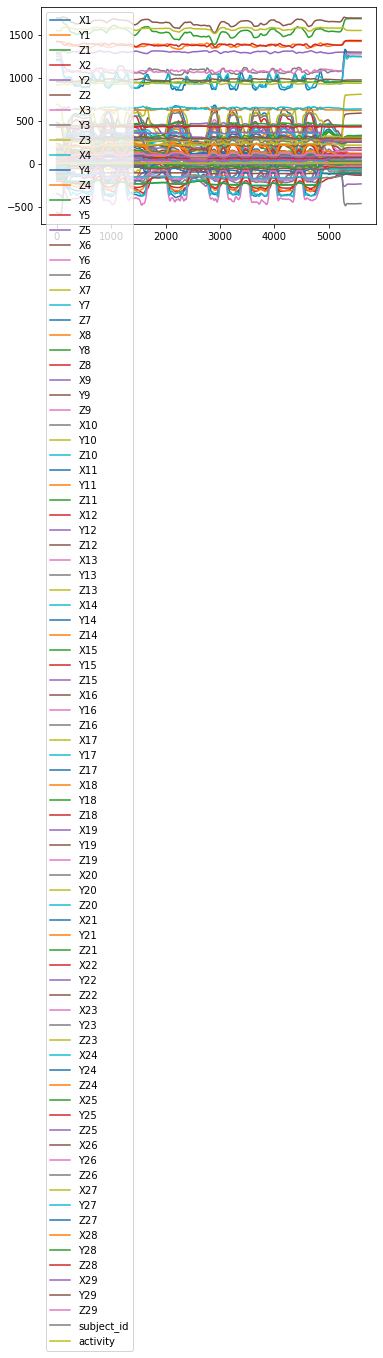

In [7]:
temp.plot()

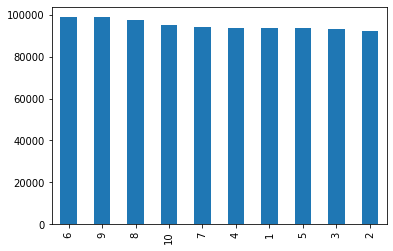

In [6]:
data['activity'].value_counts().plot.bar()

In [13]:
data = data.fillna(0)

In [14]:
data.isnull().sum().sum()

0

In [15]:
def segmentation(x_data,overlap_rate,time_window):
    
    # make a list for segment window and its label
    seg_data = []
    y_segmented_list = []

    #convert overlap rate to step for sliding window
    overlap = int((1 - overlap_rate)*time_window)
    
    #segment and keep the labels
    for i in range(0,x_data.shape[0],overlap):
        seg_data.append(x_data[i:i+time_window])
        y_segmented_list.append(x_data['activity'][i])
        
    return seg_data,y_segmented_list

In [16]:
def get_features(x_data):
    #Set features list
    features = []
    #Set columns name list
    DFclist=list(x_data.columns)

    #Calculate features (STD, Average, Max, Min) for each data columns X Y Z 
    for k in DFclist:
        # std
        features.append(x_data[k].std(ddof=0))
        # avg
        features.append(np.average(x_data[k]))
        # max
        features.append(np.max(x_data[k]))
        # min
        features.append(np.min(x_data[k]))
    return features

In [39]:
from sklearn.ensemble import RandomForestClassifier         
model_ml = RandomForestClassifier(n_estimators=500,n_jobs=-1)

In [50]:
#Segmentation with overlaprate=0 & window=100
df1_itpl=data.reset_index(drop = True).interpolate()
#replace missing values with 0
df1_itpl=df1_itpl.fillna(0) 
[seg, seg_label]=segmentation(df1_itpl,0.5,750)
      

In [51]:
#set list
features_list=[]
label_list=[]
for j in tqdm(range(0,len(seg))):
    #extract only xyz columns
            frame1=seg[j].drop(columns=['subject_id','activity'])
            

            #Get features and label for each elements
            features_list.append(get_features(frame1))
            label_list.append(seg_label[j])

100%|██████████| 2536/2536 [01:07<00:00, 37.51it/s]


In [52]:
X_train, X_test, y_train, y_test = train_test_split(features_list, label_list, test_size=0.3, random_state=42)

In [53]:
model_ml.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=-1, oob_score=False, random_state=None, verbose=0,
                       warm_start=False)

              precision    recall  f1-score   support

           1       0.93      0.93      0.93        61
           2       0.93      0.81      0.86        62
           3       0.89      0.84      0.86        76
           4       0.85      0.89      0.87        88
           5       0.88      0.82      0.85        74
           6       0.93      0.97      0.95        73
           7       0.95      0.92      0.94        78
           8       0.83      0.97      0.89        88
           9       0.90      0.92      0.91        85
          10       0.97      0.92      0.95        76

    accuracy                           0.90       761
   macro avg       0.91      0.90      0.90       761
weighted avg       0.90      0.90      0.90       761



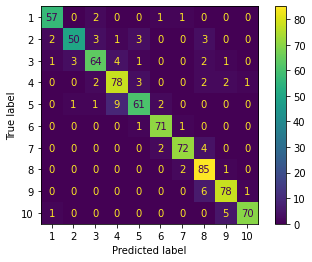

In [54]:
from sklearn.metrics import classification_report
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix

y_predict = model_ml.predict(X_test)
print(classification_report(y_test,y_predict))
#confusion_matrix(y_test, y_predict)
plot_confusion_matrix(model_ml, X_test, y_test)
plt.show()

In [55]:
pickle.dump(model_ml,open("/content/drive/MyDrive/Competitions/2021/Bento 2021/Models/RFC2/rfc2.sav","wb"))